In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Load the data from the uploaded CSV file
file_path = 'wpsSimulator.csv'
data = pd.read_csv(file_path)

/tmp/ipykernel_44265/1471813309.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_have_emotions['internalCurrentDate'] = pd.to_datetime(data_have_emotions['internalCurrentDate'], format='%d/%m/%Y')
/tmp/ipykernel_44265/1471813309.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_no_emotions['internalCurrentDate'] = pd.to_datetime(data_no_emotions['internalCurrentDate'], format='%d/%m/%Y')
/tmp/ipykernel_44265/1471813309.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a 

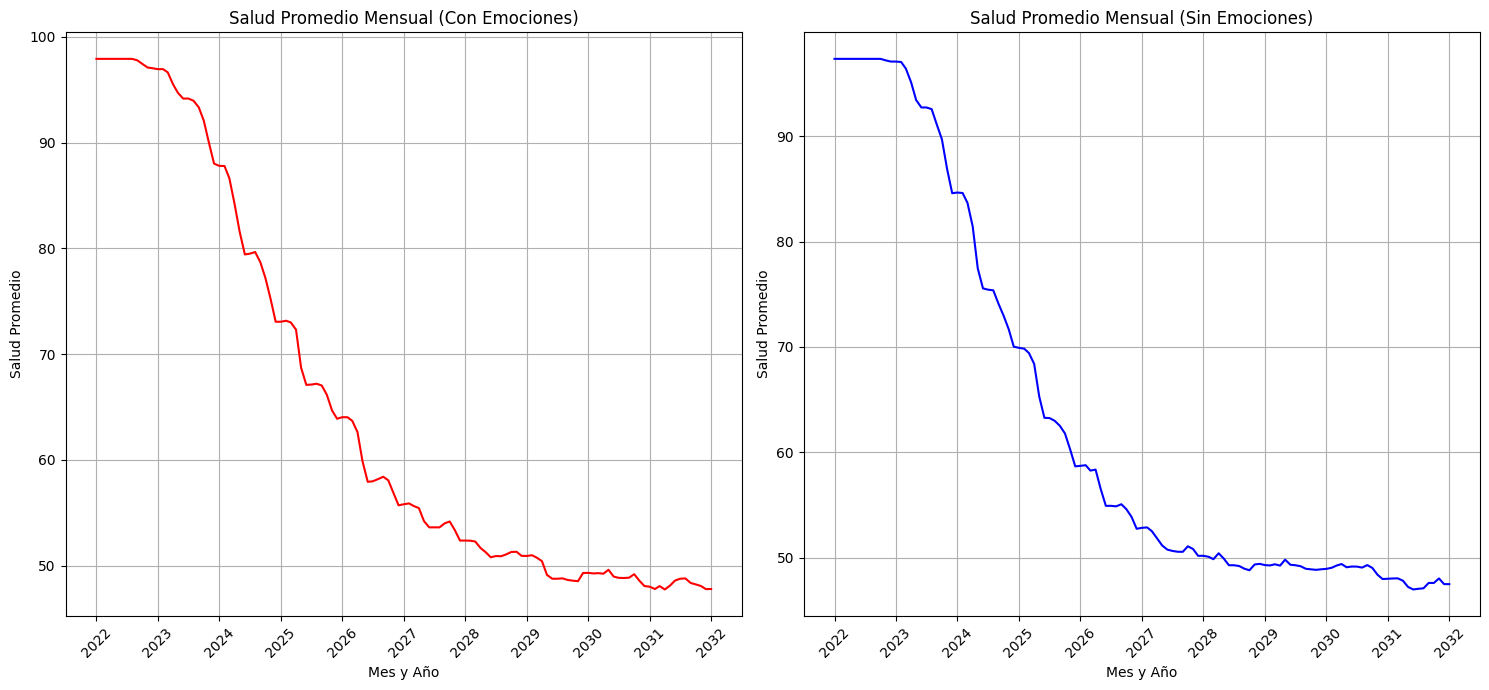

In [8]:
# Alternative method to extract year and month without using .dt.to_period('M')
data_have_emotions['internalCurrentDate'] = pd.to_datetime(data_have_emotions['internalCurrentDate'], format='%d/%m/%Y')
data_no_emotions['internalCurrentDate'] = pd.to_datetime(data_no_emotions['internalCurrentDate'], format='%d/%m/%Y')

data_have_emotions['Year'] = data_have_emotions['internalCurrentDate'].dt.year
data_have_emotions['Month'] = data_have_emotions['internalCurrentDate'].dt.month

data_no_emotions['Year'] = data_no_emotions['internalCurrentDate'].dt.year
data_no_emotions['Month'] = data_no_emotions['internalCurrentDate'].dt.month

# Grouping by year and month and calculating mean health
monthly_grouped_have_emotions_alt = data_have_emotions.groupby(['Year', 'Month'])['health'].mean().reset_index()
monthly_grouped_no_emotions_alt = data_no_emotions.groupby(['Year', 'Month'])['health'].mean().reset_index()

# Creating a combined year-month column for plotting
monthly_grouped_have_emotions_alt['YearMonth'] = pd.to_datetime(monthly_grouped_have_emotions_alt[['Year', 'Month']].assign(DAY=1))
monthly_grouped_no_emotions_alt['YearMonth'] = pd.to_datetime(monthly_grouped_no_emotions_alt[['Year', 'Month']].assign(DAY=1))

# Plotting the monthly average health values over time for both groups
plt.figure(figsize=(15, 7))

# Plot for agents with emotions
plt.subplot(1, 2, 1)
plt.plot(monthly_grouped_have_emotions_alt['YearMonth'], monthly_grouped_have_emotions_alt['health'], color='red')
plt.title('Salud Promedio Mensual (Con Emociones)')
plt.xlabel('Mes y Año')
plt.ylabel('Salud Promedio')
plt.xticks(rotation=45)
plt.grid(True)

# Plot for agents without emotions
plt.subplot(1, 2, 2)
plt.plot(monthly_grouped_no_emotions_alt['YearMonth'], monthly_grouped_no_emotions_alt['health'], color='blue')
plt.title('Salud Promedio Mensual (Sin Emociones)')
plt.xlabel('Mes y Año')
plt.ylabel('Salud Promedio')
plt.xticks(rotation=45)
plt.grid(True)

plt.tight_layout()
plt.show()

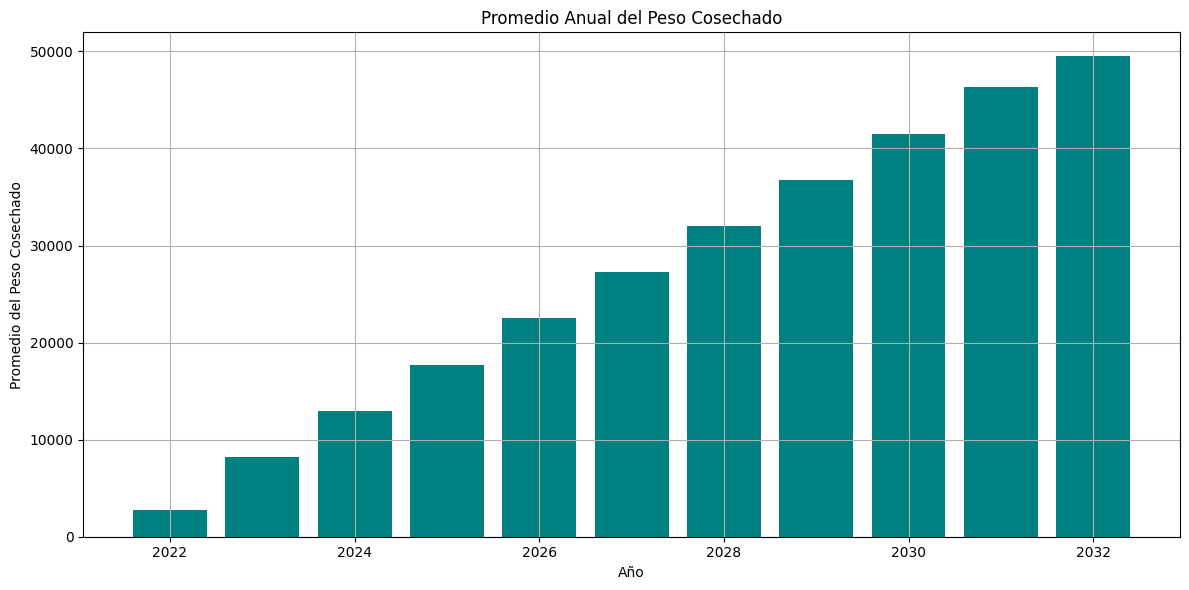

In [11]:
# Extracting the year from 'internalCurrentDate'
data['internalCurrentDate'] = pd.to_datetime(data['internalCurrentDate'], format='%d/%m/%Y')
data['Year'] = data['internalCurrentDate'].dt.year

# Grouping by year and calculating the average of 'totalHarvestedWeight' for each year
average_harvested_weight_per_year = data.groupby('Year')['harvestedWeight'].mean().reset_index()

# Plotting the average harvested weight per year
plt.figure(figsize=(12, 6))
plt.bar(average_harvested_weight_per_year['Year'], average_harvested_weight_per_year['totalHarvestedWeight'], color='teal')
plt.title('Promedio Anual del Peso Cosechado')
plt.xlabel('Año')
plt.ylabel('Promedio del Peso Cosechado')
plt.grid(True)
plt.tight_layout()

# Showing the plot
plt.show()
